In [2]:
# Regression ( 회귀 )
# 숫자값 예측이 목적 
# ex) 주택에 대한 정보 (방의 개수, 크기, 욕실 수 등 ) -> 주택의 판매 가격
# 이미지에서 어떤 항목의 경계 상자의 자료를 예측
# 인구 통계 ( 연령, 성별, 인종 등) -> 의료보험 비용 등등 예측 

# 입력 (데이터) -> 패턴을 발견하는 신경망 -> 출력 (예측)
# 1. 분석하기 쉬운 형태로 데이터를 준비
# 2. 패턴을 발견하는 신경망을 만드는 것 
# 3. 만든 신경망의 결과를 확인 

In [ ]:
# 앞으로 우리가 할일
# 1. 회귀 모델의 아키텍처를 확인
# 2. 입력과 출력의 형태를 만들어준다.
#    - 'X' (입력) : feature / 데이터 (입력)
#    - 'Y' (출력) : 레이블 (lable)   (출력)
# 3. 모델링 단계
#    1) 모델 생성
#    2) 모델 컴파일
#       - 손실 함수 적용
#       - 최적화 프로그램 설정
#       - 평가 지표 생성
#    3) 모델 피팅 (데이터에서 패턴을 찾는 과정)
# 4. 모델 평가
#    1) 모델 시각화
#    2) 학습 곡선 확인
#    3) 예측 결과를 실제 데이터와 비교 (평가 지표 사용)
# 5. 모델 저장 (나중의 사용을 위해서)
# 6. 모델 가져와서 사용하기

## 회귀 신경망의 일반적인 구조 (아키텍처)

신경망을 생성하는 방법은 매우 다양하다. 그래도 일반적인 방법이 존재

데이터 수집 -> 데이터에서 패턴 찾기 -> 결과 만들기



* Input Layer (입력층) : 특성 (feature, column, variable)의 갯수 (shape)

* Hidden Layer (은닉층) : 해결하려는 문제에 따라 최소 1개 이상으로 이루어짐 
* 은닉층 각각을 구성하는 뉴런 : 해결하려는 문제에 따라 최소 10 ~ 최대 100으로 이루어진다.
* Output Layer shape (출력층의 형태) : 우리가 예측값을 얻고자 하는 형태 (주택의 가격이라면 1)
* 은닉층 활성화 함수 : [RelU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

* 출력층 활성화 함수 : None, ReLU, logistic/tanh
* 손실함수의 경우 : MSE (Mean Square error), MAE (Mean absolute error) / Huber (MSE+MAE) : 특이값이 있으면 사용
* 옵티마이저 (최적화) : SGD (stochastic gradient descent), Adam

**hyperparameter** *(하이퍼파라미터)* : 머신러닝 분야에서 하이퍼파라미터라는 단어는 데이터 분석가나 개발자들이 설정하는 값

**parameter** *(파라미터)* : 분석가나 개발자들이 명시적으로 설정한 값이 아닌 모델이 스스로 파악한 값 


# Regression problem ( 회귀 문제 )

## 회귀 --> 특정 값을 예측 !

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

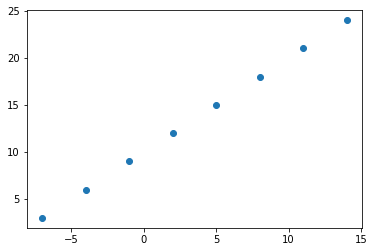

In [2]:
# feature 특성, 변수
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

모델을 만들기 전에 EDA (Explorary Data Analysis) 탐색적 자료 분석을 해서 

위의 경우 처럼 X, y 의 관계, 즉 패턴을 찾으려고 한다!

위의 패턴이라면 17은 어떤 값일까? -10은 어떤 값일까?

## 신경망 (neural network)로 작업을 할 때 가장 중요한 개념!

### **input shape (입력의 모양)** : 모델을 만들기 위한 데이터의 형태
### **output shaple (출력의 모양)** : 모델을 통해서 예측하고자 하는 데이터의 형태

문제에 따라 입력과 출력의 모양 각기 각각이다.

신경망은 숫자를 입력 받고, 숫자를 출력! 이 때 일반적으로 tensor나 array로 처리합니다.

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
house_info.shape

TensorShape([3])

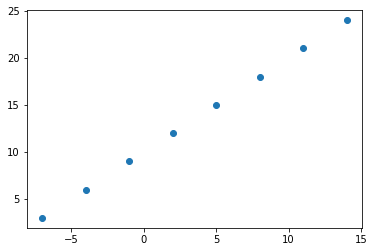

In [6]:
# feature 특성, 변수
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, type(input_shape), X[0].ndim, output_shape, type(output_shape), y[0].ndim

(TensorShape([]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 0,
 TensorShape([]),
 tensorflow.python.framework.tensor_shape.TensorShape,
 0)

In [15]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [24]:
## TODO : tf의 seed에 대해 정리 하기 
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

## epochs 의 의미 파악 
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 392ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================] - 0s 

In [25]:
model.predict([17.0, -10.]) # epoch 200

array([[ 30.908516],
       [-15.668092]], dtype=float32)

In [3]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [4]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [5]:
# 원래 X, y의 관계 y = X+10의 관계
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [6]:
len(X), len(y)

(50, 50)

In [7]:
# 보통 학습 및 테스트 데이터를 나눌 때 80:20의 비율을 사용 
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

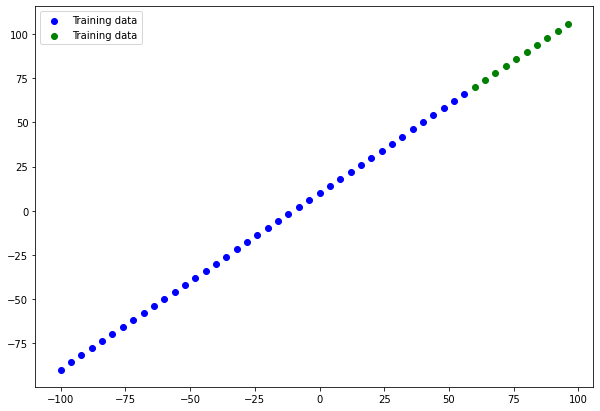

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Training data")
plt.legend()

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
